# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

18:21:11 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=586353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=570536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=551420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=468797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=130570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=549087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

18:21:13 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=726474;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=167755;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=366977;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=880848;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

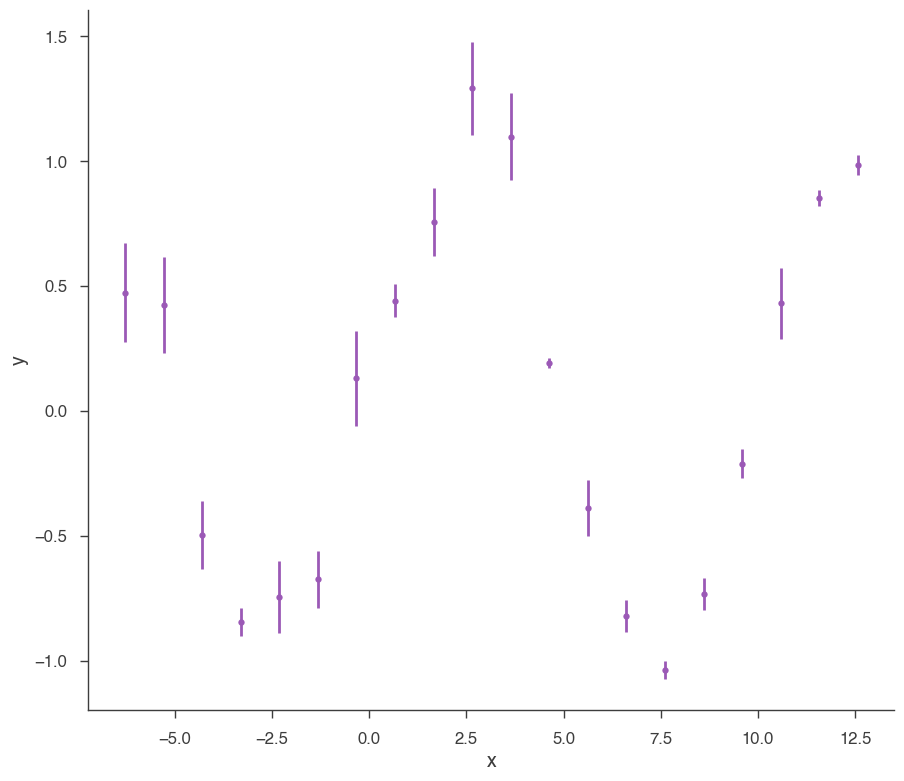

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

18:21:14 INFO      sampler set to emcee                                                    ]8;id=559470;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=158345;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

18:21:16 INFO      Mean acceptance fraction: 0.7026                                            ]8;id=897778;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=158573;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

18:21:17 INFO      fit restored to maximum of posterior                                         ]8;id=143511;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=45051;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=889787;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=826036;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.94 -0.17 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 -0.004 +0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.151666
total,-10.151666


Values of statistical measures:

,statistical measures
AIC,25.009214
BIC,26.294796
DIC,24.396598
PDIC,2.045206


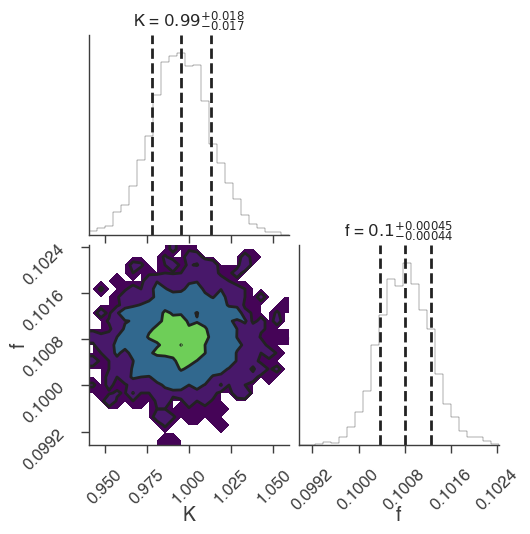

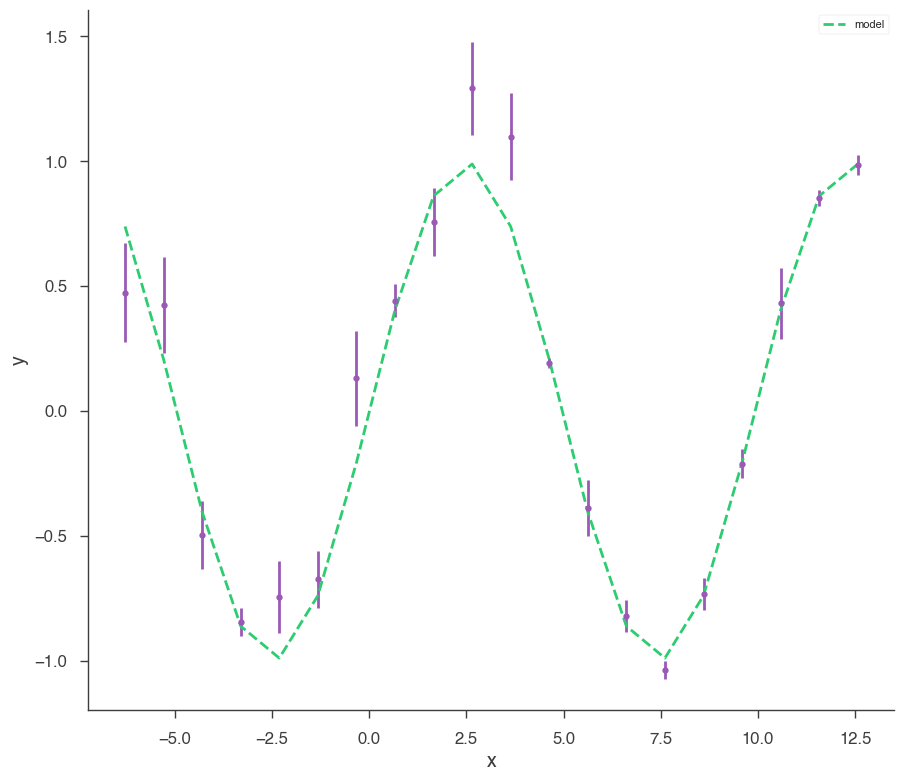

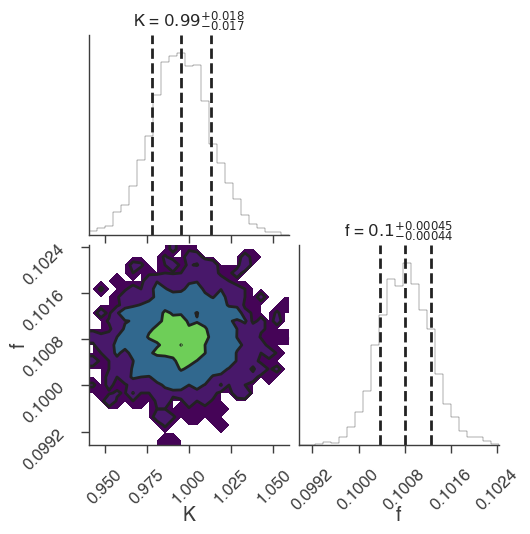

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

18:21:18 INFO      sampler set to multinest                                                ]8;id=502402;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=717077;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -19.550386840436225      +/-  0.14460799568641486     
 Total Likelihood Evaluations:         5885
 Sampling finished. Exiting MultiNest



18:21:19 INFO      fit restored to maximum of posterior                                         ]8;id=438498;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=99087;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=678188;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=570799;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.17 +0.22) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 -0.005 +0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.156786
total,-10.156786


Values of statistical measures:

,statistical measures
AIC,25.019455
BIC,26.305037
DIC,24.326671
PDIC,2.011396
log(Z),-8.490625


         INFO      deleting the chain directory chains                                     ]8;id=571419;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=533462;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

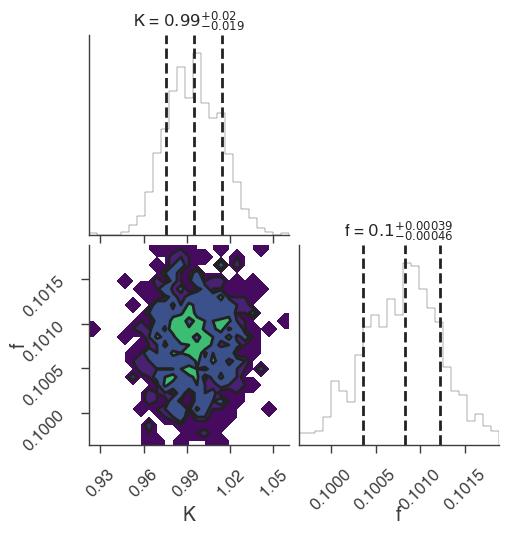

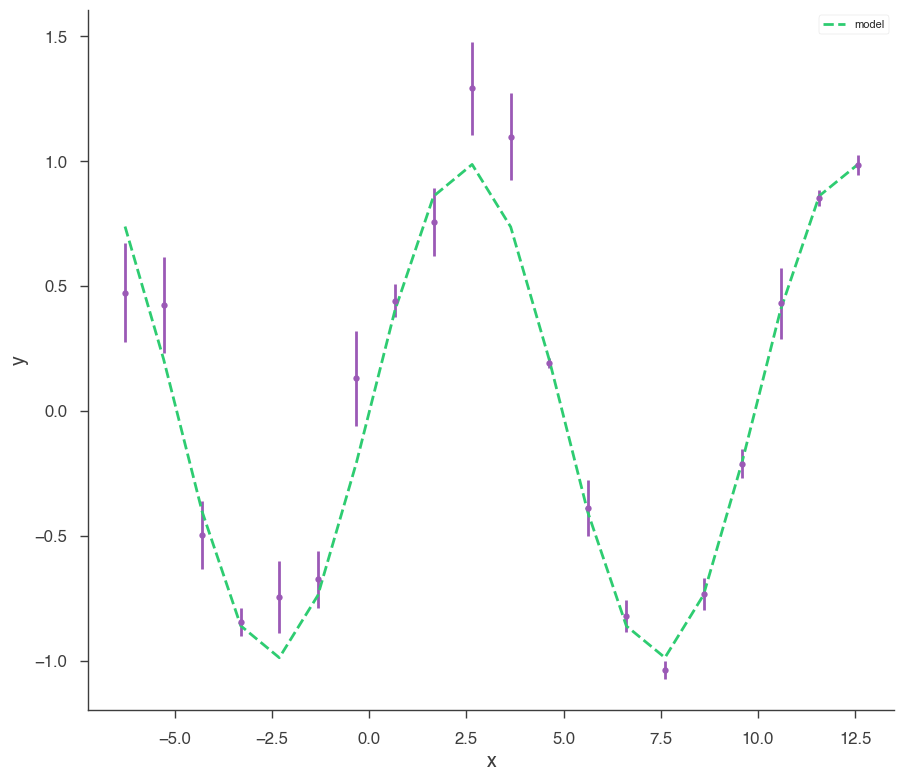

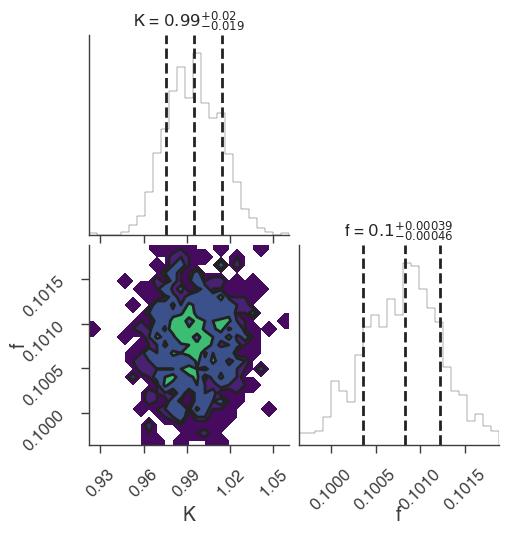

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=448481;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=407751;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

258it [00:00, 2571.74it/s, bound: 0 | nc: 1 | ncall: 772 | eff(%): 33.420 | loglstar:   -inf < -2608.779 <    inf | logz: -2615.358 +/-  0.125 | dlogz: 2596.218 >  0.409]

516it [00:00, 1928.88it/s, bound: 0 | nc: 6 | ncall: 1443 | eff(%): 35.759 | loglstar:   -inf < -1987.702 <    inf | logz: -1994.748 +/-  0.125 | dlogz: 1974.451 >  0.409]

719it [00:00, 1541.74it/s, bound: 0 | nc: 4 | ncall: 2441 | eff(%): 29.455 | loglstar:   -inf < -1698.400 <    inf | logz: -1705.879 +/-  0.132 | dlogz: 1689.183 >  0.409]

884it [00:00, 1167.73it/s, bound: 0 | nc: 3 | ncall: 3864 | eff(%): 22.878 | loglstar:   -inf < -1432.094 <    inf | logz: -1439.787 +/-  0.135 | dlogz: 1422.583 >  0.409]

1014it [00:00, 914.60it/s, bound: 0 | nc: 3 | ncall: 5342 | eff(%): 18.982 | loglstar:   -inf < -1013.556 <    inf | logz: -1022.773 +/-  0.152 | dlogz: 1020.607 >  0.409]

1118it [00:01, 737.58it/s, bound: 0 | nc: 16 | ncall: 7297 | eff(%): 15.321 | loglstar:   -inf < -624.757 <    inf | logz: -633.933 +/-  0.147 | dlogz: 620.092 >  0.409]  

1202it [00:01, 562.36it/s, bound: 0 | nc: 30 | ncall: 9543 | eff(%): 12.596 | loglstar:   -inf < -465.893 <    inf | logz: -474.686 +/-  0.140 | dlogz: 459.454 >  0.409]

1268it [00:01, 497.31it/s, bound: 0 | nc: 53 | ncall: 11289 | eff(%): 11.232 | loglstar:   -inf < -372.983 <    inf | logz: -381.890 +/-  0.140 | dlogz: 366.472 >  0.409]

1324it [00:01, 374.68it/s, bound: 1 | nc: 1 | ncall: 13283 | eff(%):  9.968 | loglstar:   -inf < -330.751 <    inf | logz: -339.596 +/-  0.141 | dlogz: 326.430 >  0.409] 

1553it [00:01, 665.89it/s, bound: 1 | nc: 2 | ncall: 13606 | eff(%): 11.414 | loglstar:   -inf < -198.773 <    inf | logz: -208.071 +/-  0.143 | dlogz: 194.388 >  0.409]

1694it [00:02, 702.67it/s, bound: 2 | nc: 1 | ncall: 13887 | eff(%): 12.198 | loglstar:   -inf < -151.009 <    inf | logz: -160.005 +/-  0.142 | dlogz: 145.721 >  0.409]

1914it [00:02, 976.84it/s, bound: 2 | nc: 2 | ncall: 14202 | eff(%): 13.477 | loglstar:   -inf < -88.488 <    inf | logz: -97.600 +/-  0.144 | dlogz: 82.656 >  0.409]   

2047it [00:02, 899.09it/s, bound: 3 | nc: 1 | ncall: 14499 | eff(%): 14.118 | loglstar:   -inf < -66.457 <    inf | logz: -75.506 +/-  0.140 | dlogz: 60.167 >  0.409]

2274it [00:02, 1175.82it/s, bound: 3 | nc: 1 | ncall: 14811 | eff(%): 15.353 | loglstar:   -inf < -41.863 <    inf | logz: -51.112 +/-  0.142 | dlogz: 35.323 >  0.409]

2423it [00:02, 1039.19it/s, bound: 4 | nc: 2 | ncall: 15120 | eff(%): 16.025 | loglstar:   -inf < -31.367 <    inf | logz: -40.394 +/-  0.142 | dlogz: 24.192 >  0.409]

2647it [00:02, 1290.04it/s, bound: 4 | nc: 4 | ncall: 15437 | eff(%): 17.147 | loglstar:   -inf < -21.951 <    inf | logz: -31.286 +/-  0.144 | dlogz: 14.536 >  0.409]

2803it [00:03, 1121.60it/s, bound: 5 | nc: 2 | ncall: 15747 | eff(%): 17.800 | loglstar:   -inf < -18.052 <    inf | logz: -27.069 +/-  0.143 | dlogz:  9.909 >  0.409]

3001it [00:03, 1305.51it/s, bound: 5 | nc: 2 | ncall: 16071 | eff(%): 18.673 | loglstar:   -inf < -14.814 <    inf | logz: -23.906 +/-  0.142 | dlogz:  6.248 >  0.409]

3155it [00:03, 1127.35it/s, bound: 6 | nc: 1 | ncall: 16373 | eff(%): 19.270 | loglstar:   -inf < -13.171 <    inf | logz: -22.281 +/-  0.142 | dlogz:  4.247 >  0.409]

3369it [00:03, 1346.52it/s, bound: 6 | nc: 2 | ncall: 16727 | eff(%): 20.141 | loglstar:   -inf < -11.881 <    inf | logz: -20.931 +/-  0.142 | dlogz:  2.450 >  0.409]

3526it [00:03, 1160.45it/s, bound: 7 | nc: 1 | ncall: 17007 | eff(%): 20.733 | loglstar:   -inf < -11.384 <    inf | logz: -20.344 +/-  0.142 | dlogz:  1.604 >  0.409]

3740it [00:03, 1373.24it/s, bound: 7 | nc: 3 | ncall: 17361 | eff(%): 21.543 | loglstar:   -inf < -10.896 <    inf | logz: -19.862 +/-  0.141 | dlogz:  0.895 >  0.409]

3898it [00:03, 1190.78it/s, bound: 8 | nc: 1 | ncall: 17614 | eff(%): 22.130 | loglstar:   -inf < -10.677 <    inf | logz: -19.639 +/-  0.141 | dlogz:  0.577 >  0.409]

4021it [00:04, 1003.43it/s, +400 | bound: 8 | nc: 1 | ncall: 18207 | eff(%): 24.827 | loglstar:   -inf < -10.158 <    inf | logz: -19.166 +/-  0.141 | dlogz:  0.001 >  0.409]

18:21:23 INFO      fit restored to maximum of posterior                                         ]8;id=183755;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=146756;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=273204;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=215975;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.95 -0.19 +0.17) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 -0.004 +0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.153333
total,-10.153333


Values of statistical measures:

,statistical measures
AIC,25.012548
BIC,26.298130
DIC,24.347400
PDIC,2.020852
log(Z),-8.323552


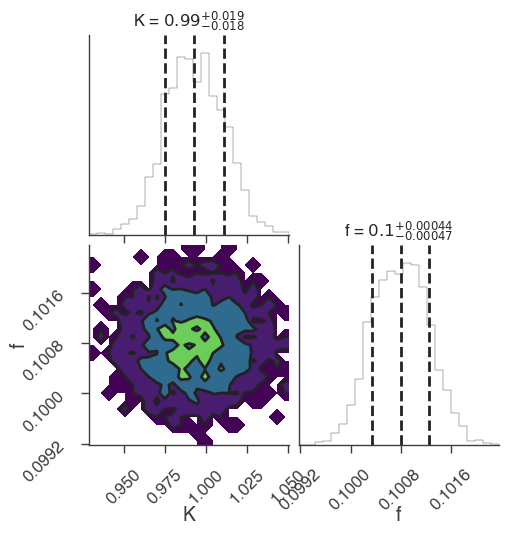

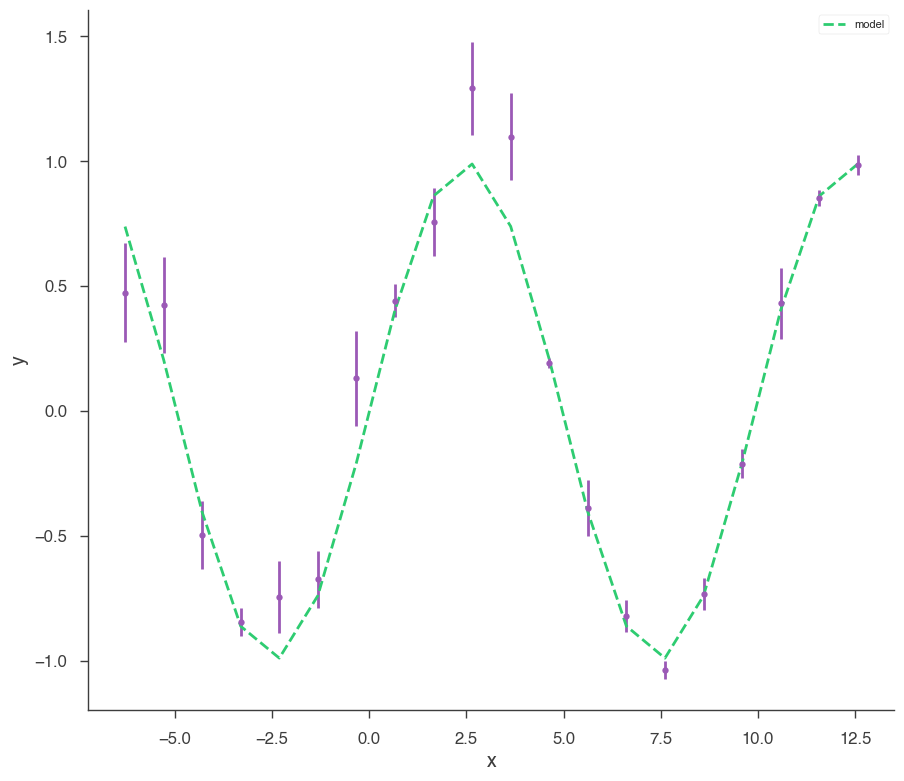

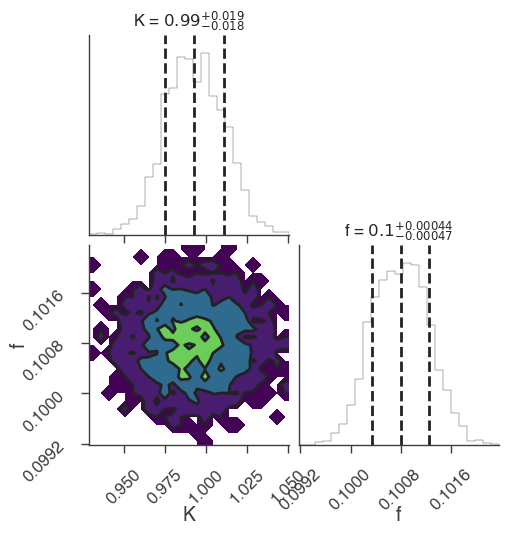

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

18:21:24 INFO      sampler set to dynesty_dynamic                                          ]8;id=500109;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=621237;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

123it [00:00, 1227.79it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 138 | eff(%): 19.279 | loglstar:   -inf < -3696.401 <    inf | logz: -3703.457 +/-  0.116 | dlogz: 3691.783 >  0.010]

334it [00:00, 1745.99it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 481 | eff(%): 34.047 | loglstar:   -inf < -2609.786 <    inf | logz: -2616.766 +/-  0.114 | dlogz: 2603.059 >  0.010]

509it [00:00, 1726.42it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 895 | eff(%): 36.487 | loglstar:   -inf < -2229.750 <    inf | logz: -2237.528 +/-  0.121 | dlogz: 2224.351 >  0.010]

682it [00:00, 1625.68it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1403 | eff(%): 35.838 | loglstar:   -inf < -1958.715 <    inf | logz: -1966.790 +/-  0.122 | dlogz: 1952.928 >  0.010]

846it [00:00, 1340.94it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2234 | eff(%): 30.944 | loglstar:   -inf < -1785.331 <    inf | logz: -1792.109 +/-  0.113 | dlogz: 1779.780 >  0.010]

987it [00:00, 1120.16it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3162 | eff(%): 26.952 | loglstar:   -inf < -1628.593 <    inf | logz: -1636.688 +/-  0.120 | dlogz: 1624.604 >  0.010]

1108it [00:00, 921.61it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 4297 | eff(%): 23.098 | loglstar:   -inf < -1481.112 <    inf | logz: -1489.881 +/-  0.124 | dlogz: 1478.065 >  0.010]

1210it [00:01, 763.29it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 5499 | eff(%): 20.170 | loglstar:   -inf < -1403.908 <    inf | logz: -1412.476 +/-  0.123 | dlogz: 1399.926 >  0.010]

1295it [00:01, 726.89it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 6419 | eff(%): 18.717 | loglstar:   -inf < -1353.540 <    inf | logz: -1361.734 +/-  0.120 | dlogz: 1348.757 >  0.010]

1373it [00:01, 644.26it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 7390 | eff(%): 17.402 | loglstar:   -inf < -1047.143 <    inf | logz: -1055.620 +/-  0.124 | dlogz: 1042.489 >  0.010]

1442it [00:01, 605.47it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 8387 | eff(%): 16.226 | loglstar:   -inf < -802.529 <    inf | logz: -812.005 +/-  0.133 | dlogz: 799.881 >  0.010]    

1505it [00:01, 498.96it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 9701 | eff(%): 14.753 | loglstar:   -inf < -637.478 <    inf | logz: -647.368 +/-  0.140 | dlogz: 637.396 >  0.010]

1559it [00:01, 466.73it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 10827 | eff(%): 13.764 | loglstar:   -inf < -551.013 <    inf | logz: -560.935 +/-  0.138 | dlogz: 549.491 >  0.010]

1608it [00:02, 416.25it/s, batch: 0 | bound: 0 | nc: 140 | ncall: 12104 | eff(%): 12.758 | loglstar:   -inf < -479.993 <    inf | logz: -488.538 +/-  0.128 | dlogz: 474.801 >  0.010]

1651it [00:02, 385.10it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 12982 | eff(%): 12.246 | loglstar:   -inf < -428.468 <    inf | logz: -438.289 +/-  0.135 | dlogz: 425.663 >  0.010] 

1691it [00:02, 333.52it/s, batch: 0 | bound: 0 | nc: 98 | ncall: 14114 | eff(%): 11.571 | loglstar:   -inf < -391.376 <    inf | logz: -400.027 +/-  0.123 | dlogz: 385.974 >  0.010]

1726it [00:02, 319.09it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 15020 | eff(%): 11.121 | loglstar:   -inf < -362.892 <    inf | logz: -372.039 +/-  0.130 | dlogz: 358.358 >  0.010]

1759it [00:02, 304.83it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 15775 | eff(%): 10.808 | loglstar:   -inf < -346.850 <    inf | logz: -355.684 +/-  0.124 | dlogz: 342.129 >  0.010] 

1790it [00:02, 288.14it/s, batch: 0 | bound: 0 | nc: 59 | ncall: 17027 | eff(%): 10.213 | loglstar:   -inf < -327.715 <    inf | logz: -336.477 +/-  0.125 | dlogz: 322.802 >  0.010]

1819it [00:03, 225.41it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17560 | eff(%): 10.072 | loglstar:   -inf < -313.809 <    inf | logz: -322.293 +/-  0.124 | dlogz: 308.517 >  0.010] 

2038it [00:03, 635.31it/s, batch: 0 | bound: 1 | nc: 5 | ncall: 17859 | eff(%): 11.101 | loglstar:   -inf < -209.970 <    inf | logz: -218.675 +/-  0.127 | dlogz: 204.376 >  0.010]

2212it [00:03, 888.66it/s, batch: 0 | bound: 1 | nc: 6 | ncall: 18218 | eff(%): 11.818 | loglstar:   -inf < -155.692 <    inf | logz: -165.242 +/-  0.132 | dlogz: 150.784 >  0.010]

2322it [00:03, 740.76it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 18405 | eff(%): 12.282 | loglstar:   -inf < -120.801 <    inf | logz: -130.193 +/-  0.128 | dlogz: 115.432 >  0.010]

2545it [00:03, 1064.08it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18824 | eff(%): 13.170 | loglstar:   -inf < -81.158 <    inf | logz: -89.900 +/-  0.127 | dlogz: 74.672 >  0.010]  

2677it [00:03, 884.43it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19084 | eff(%): 13.669 | loglstar:   -inf < -67.160 <    inf | logz: -76.480 +/-  0.129 | dlogz: 61.016 >  0.010] 

2894it [00:03, 1154.25it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 19388 | eff(%): 14.551 | loglstar:   -inf < -47.680 <    inf | logz: -56.769 +/-  0.129 | dlogz: 40.820 >  0.010]

3074it [00:04, 1058.97it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19797 | eff(%): 15.145 | loglstar:   -inf < -35.199 <    inf | logz: -44.812 +/-  0.132 | dlogz: 28.577 >  0.010]

3281it [00:04, 1272.64it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20072 | eff(%): 15.949 | loglstar:   -inf < -26.466 <    inf | logz: -35.744 +/-  0.130 | dlogz: 19.061 >  0.010]

3463it [00:04, 1398.60it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20424 | eff(%): 16.550 | loglstar:   -inf < -22.087 <    inf | logz: -31.206 +/-  0.128 | dlogz: 14.147 >  0.010]

3623it [00:04, 1112.79it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20693 | eff(%): 17.095 | loglstar:   -inf < -18.356 <    inf | logz: -27.826 +/-  0.130 | dlogz: 10.448 >  0.010]

3817it [00:04, 1290.12it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21015 | eff(%): 17.741 | loglstar:   -inf < -15.969 <    inf | logz: -25.300 +/-  0.129 | dlogz:  7.528 >  0.010]

3969it [00:04, 1056.40it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21309 | eff(%): 18.199 | loglstar:   -inf < -14.539 <    inf | logz: -23.887 +/-  0.129 | dlogz:  5.810 >  0.010]

4173it [00:04, 1259.87it/s, batch: 0 | bound: 6 | nc: 4 | ncall: 21575 | eff(%): 18.904 | loglstar:   -inf < -13.005 <    inf | logz: -22.440 +/-  0.129 | dlogz:  3.970 >  0.010]

4348it [00:04, 1370.98it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21919 | eff(%): 19.394 | loglstar:   -inf < -12.126 <    inf | logz: -21.558 +/-  0.130 | dlogz:  2.782 >  0.010]

4506it [00:05, 1112.57it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22156 | eff(%): 19.889 | loglstar:   -inf < -11.579 <    inf | logz: -20.982 +/-  0.130 | dlogz:  1.975 >  0.010]

4725it [00:05, 1343.98it/s, batch: 0 | bound: 7 | nc: 3 | ncall: 22498 | eff(%): 20.545 | loglstar:   -inf < -11.055 <    inf | logz: -20.451 +/-  0.130 | dlogz:  1.210 >  0.010]

4884it [00:05, 1079.91it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22834 | eff(%): 20.931 | loglstar:   -inf < -10.797 <    inf | logz: -20.192 +/-  0.130 | dlogz:  0.842 >  0.010]

5101it [00:05, 1303.62it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 23135 | eff(%): 21.582 | loglstar:   -inf < -10.572 <    inf | logz: -19.949 +/-  0.130 | dlogz:  0.514 >  0.010]

5286it [00:05, 1423.73it/s, batch: 0 | bound: 8 | nc: 8 | ncall: 23493 | eff(%): 22.031 | loglstar:   -inf < -10.454 <    inf | logz: -19.813 +/-  0.130 | dlogz:  0.340 >  0.010]

5451it [00:05, 1192.17it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 23715 | eff(%): 22.511 | loglstar:   -inf < -10.373 <    inf | logz: -19.729 +/-  0.130 | dlogz:  0.237 >  0.010]

5651it [00:06, 1366.39it/s, batch: 0 | bound: 9 | nc: 6 | ncall: 24049 | eff(%): 23.019 | loglstar:   -inf < -10.311 <    inf | logz: -19.658 +/-  0.130 | dlogz:  0.155 >  0.010]

5809it [00:06, 1127.06it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24345 | eff(%): 23.381 | loglstar:   -inf < -10.272 <    inf | logz: -19.620 +/-  0.129 | dlogz:  0.111 >  0.010]

6031it [00:06, 1359.07it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24641 | eff(%): 23.989 | loglstar:   -inf < -10.231 <    inf | logz: -19.582 +/-  0.129 | dlogz:  0.070 >  0.010]

6210it [00:06, 1459.27it/s, batch: 0 | bound: 10 | nc: 7 | ncall: 25031 | eff(%): 24.323 | loglstar:   -inf < -10.208 <    inf | logz: -19.562 +/-  0.129 | dlogz:  0.049 >  0.010]

6376it [00:06, 1258.12it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25240 | eff(%): 24.771 | loglstar:   -inf < -10.194 <    inf | logz: -19.548 +/-  0.129 | dlogz:  0.035 >  0.010]

6563it [00:06, 1397.92it/s, batch: 0 | bound: 11 | nc: 6 | ncall: 25565 | eff(%): 25.179 | loglstar:   -inf < -10.183 <    inf | logz: -19.538 +/-  0.129 | dlogz:  0.024 >  0.010]

6720it [00:06, 1147.15it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25856 | eff(%): 25.497 | loglstar:   -inf < -10.176 <    inf | logz: -19.532 +/-  0.129 | dlogz:  0.017 >  0.010]

7013it [00:07, 1537.74it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26288 | eff(%): 26.201 | loglstar:   -inf < -10.168 <    inf | logz: -19.524 +/-  0.129 | dlogz:  0.010 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7491it [00:07, 942.11it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26766 | eff(%): 27.987 | loglstar: -11.985 < -11.535 < -10.620 | logz: -19.515 +/-  0.133 | stop:  1.540]          

7696it [00:07, 1076.53it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27016 | eff(%): 27.939 | loglstar: -11.985 < -11.379 < -10.620 | logz: -19.515 +/-  0.133 | stop:  1.540]

7871it [00:07, 1175.48it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 27369 | eff(%): 28.212 | loglstar: -11.985 < -11.015 < -10.620 | logz: -19.515 +/-  0.133 | stop:  1.540]

8038it [00:08, 1064.92it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27638 | eff(%): 28.536 | loglstar: -11.985 < -10.746 < -10.620 | logz: -19.515 +/-  0.133 | stop:  1.540]

8430it [00:08, 1561.57it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28110 | eff(%): 29.734 | loglstar: -11.985 < -10.369 < -10.620 | logz: -19.515 +/-  0.133 | stop:  1.540]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8659it [00:09, 716.33it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28351 | eff(%): 30.542 | loglstar: -12.437 < -11.483 < -11.984 | logz: -19.515 +/-  0.109 | stop:  1.066] 

9041it [00:09, 1047.24it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28783 | eff(%): 31.132 | loglstar: -12.437 < -11.061 < -11.984 | logz: -19.515 +/-  0.109 | stop:  1.066]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9279it [00:09, 769.92it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29041 | eff(%): 31.951 | loglstar: -12.437 < -10.160 < -11.984 | logz: -19.515 +/-  0.109 | stop:  0.980] 

9279it [00:09, 959.06it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29041 | eff(%): 31.951 | loglstar: -12.437 < -10.160 < -11.984 | logz: -19.515 +/-  0.109 | stop:  0.980]

18:21:34 INFO      fit restored to maximum of posterior                                         ]8;id=774167;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=390936;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=620303;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=470795;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.94 -0.17 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.15164
total,-10.15164


Values of statistical measures:

,statistical measures
AIC,25.009162
BIC,26.294745
DIC,24.217265
PDIC,1.956919
log(Z),-8.480874


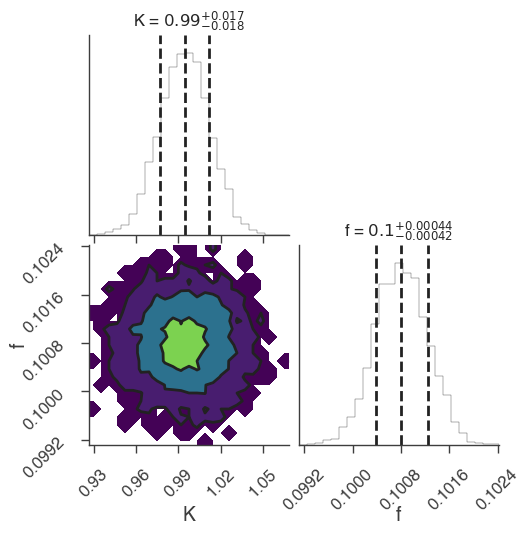

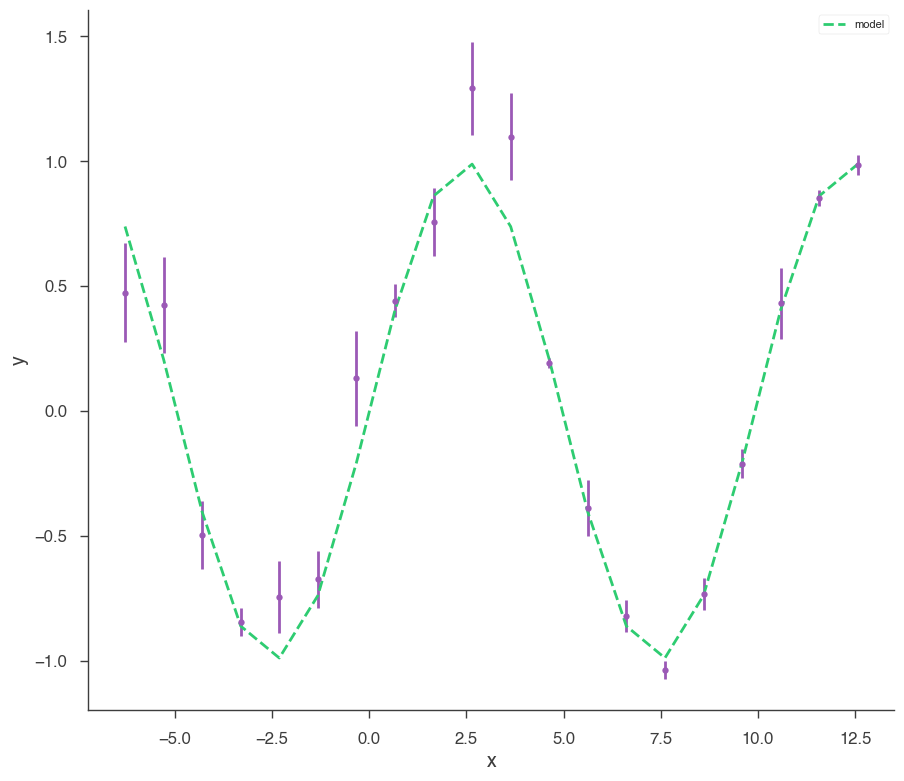

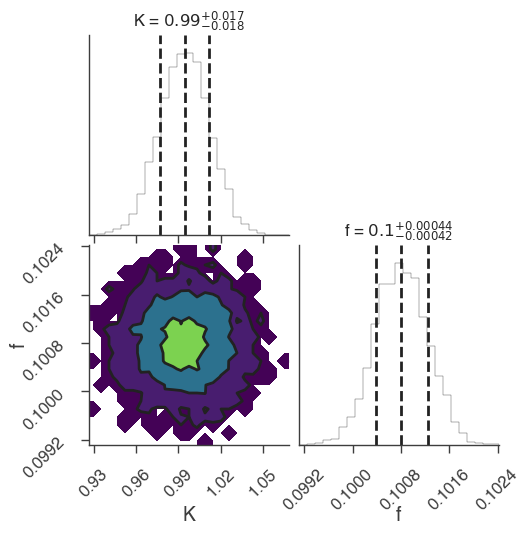

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

18:21:35 INFO      sampler set to zeus                                                     ]8;id=58025;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=125265;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 5/625 [00:00<00:13, 47.48it/s]

Sampling progress :   2%|▏         | 11/625 [00:00<00:11, 54.52it/s]

Sampling progress :   3%|▎         | 19/625 [00:00<00:09, 64.87it/s]

Sampling progress :   4%|▍         | 26/625 [00:00<00:08, 66.78it/s]

Sampling progress :   6%|▌         | 35/625 [00:00<00:08, 71.78it/s]

Sampling progress :   7%|▋         | 44/625 [00:00<00:07, 76.27it/s]

Sampling progress :   8%|▊         | 52/625 [00:00<00:07, 76.42it/s]

Sampling progress :  10%|▉         | 60/625 [00:00<00:07, 77.41it/s]

Sampling progress :  11%|█         | 68/625 [00:00<00:07, 73.37it/s]

Sampling progress :  12%|█▏        | 76/625 [00:01<00:07, 74.13it/s]

Sampling progress :  13%|█▎        | 84/625 [00:01<00:07, 72.95it/s]

Sampling progress :  15%|█▍        | 92/625 [00:01<00:07, 70.52it/s]

Sampling progress :  16%|█▌        | 100/625 [00:01<00:07, 71.30it/s]

Sampling progress :  17%|█▋        | 108/625 [00:01<00:07, 70.93it/s]

Sampling progress :  19%|█▊        | 116/625 [00:01<00:07, 70.54it/s]

Sampling progress :  20%|█▉        | 124/625 [00:01<00:06, 73.12it/s]

Sampling progress :  21%|██        | 132/625 [00:01<00:06, 73.76it/s]

Sampling progress :  22%|██▏       | 140/625 [00:01<00:06, 73.85it/s]

Sampling progress :  24%|██▍       | 149/625 [00:02<00:06, 76.92it/s]

Sampling progress :  25%|██▌       | 157/625 [00:02<00:06, 76.32it/s]

Sampling progress :  27%|██▋       | 166/625 [00:02<00:05, 77.84it/s]

Sampling progress :  28%|██▊       | 174/625 [00:02<00:05, 77.85it/s]

Sampling progress :  29%|██▉       | 182/625 [00:02<00:05, 76.63it/s]

Sampling progress :  30%|███       | 190/625 [00:02<00:05, 77.24it/s]

Sampling progress :  32%|███▏      | 198/625 [00:02<00:05, 74.49it/s]

Sampling progress :  33%|███▎      | 206/625 [00:02<00:05, 72.32it/s]

Sampling progress :  34%|███▍      | 214/625 [00:02<00:05, 70.28it/s]

Sampling progress :  36%|███▌      | 222/625 [00:03<00:05, 72.92it/s]

Sampling progress :  37%|███▋      | 230/625 [00:03<00:05, 74.65it/s]

Sampling progress :  38%|███▊      | 238/625 [00:03<00:05, 75.39it/s]

Sampling progress :  39%|███▉      | 246/625 [00:03<00:04, 76.53it/s]

Sampling progress :  41%|████      | 254/625 [00:03<00:04, 77.46it/s]

Sampling progress :  42%|████▏     | 262/625 [00:03<00:04, 77.83it/s]

Sampling progress :  43%|████▎     | 271/625 [00:03<00:04, 78.86it/s]

Sampling progress :  45%|████▍     | 279/625 [00:03<00:04, 79.06it/s]

Sampling progress :  46%|████▌     | 287/625 [00:03<00:04, 77.18it/s]

Sampling progress :  47%|████▋     | 295/625 [00:03<00:04, 75.31it/s]

Sampling progress :  48%|████▊     | 303/625 [00:04<00:04, 76.48it/s]

Sampling progress :  50%|████▉     | 311/625 [00:04<00:04, 74.50it/s]

Sampling progress :  51%|█████     | 319/625 [00:04<00:04, 75.74it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:04<00:04, 71.62it/s]

Sampling progress :  54%|█████▎    | 335/625 [00:04<00:04, 71.47it/s]

Sampling progress :  55%|█████▍    | 343/625 [00:04<00:04, 69.93it/s]

Sampling progress :  56%|█████▌    | 351/625 [00:04<00:03, 71.41it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:04<00:03, 74.73it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:04<00:03, 74.03it/s]

Sampling progress :  60%|██████    | 376/625 [00:05<00:03, 72.94it/s]

Sampling progress :  61%|██████▏   | 384/625 [00:05<00:03, 72.97it/s]

Sampling progress :  63%|██████▎   | 392/625 [00:05<00:03, 68.43it/s]

Sampling progress :  64%|██████▍   | 399/625 [00:05<00:03, 68.79it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:05<00:03, 68.42it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:05<00:03, 70.15it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:05<00:02, 72.82it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:05<00:02, 75.49it/s]

Sampling progress :  70%|███████   | 439/625 [00:05<00:02, 74.26it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:06<00:02, 75.19it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:06<00:02, 75.63it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:06<00:02, 72.96it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:06<00:02, 70.93it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:06<00:02, 68.56it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:06<00:01, 70.14it/s]

Sampling progress :  79%|███████▉  | 495/625 [00:06<00:01, 71.27it/s]

Sampling progress :  80%|████████  | 503/625 [00:06<00:01, 73.31it/s]

Sampling progress :  82%|████████▏ | 511/625 [00:06<00:01, 74.06it/s]

Sampling progress :  83%|████████▎ | 520/625 [00:07<00:01, 76.47it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:07<00:01, 78.93it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:07<00:01, 77.47it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:07<00:01, 76.63it/s]

Sampling progress :  88%|████████▊ | 553/625 [00:07<00:00, 76.63it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:07<00:00, 78.30it/s]

Sampling progress :  91%|█████████ | 570/625 [00:07<00:00, 78.29it/s]

Sampling progress :  92%|█████████▏| 578/625 [00:07<00:00, 76.60it/s]

Sampling progress :  94%|█████████▍| 586/625 [00:07<00:00, 73.46it/s]

Sampling progress :  95%|█████████▌| 594/625 [00:08<00:00, 73.55it/s]

Sampling progress :  96%|█████████▋| 602/625 [00:08<00:00, 73.68it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:08<00:00, 74.49it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:08<00:00, 68.89it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 67.93it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 73.41it/s]

18:21:44 INFO      fit restored to maximum of posterior                                         ]8;id=57902;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=494447;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=262568;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=994473;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 20


Scale Factor: 1.086682


Mean Integrated Autocorrelation Time: 2.86


Effective Sample Size: 4373.54


Number of Log Probability Evaluations: 65679


Effective Samples per Log Probability Evaluation: 0.06659


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.94 -0.17 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.151596
total,-10.151596


Values of statistical measures:

,statistical measures
AIC,25.009074
BIC,26.294656
DIC,24.280368
PDIC,1.987927


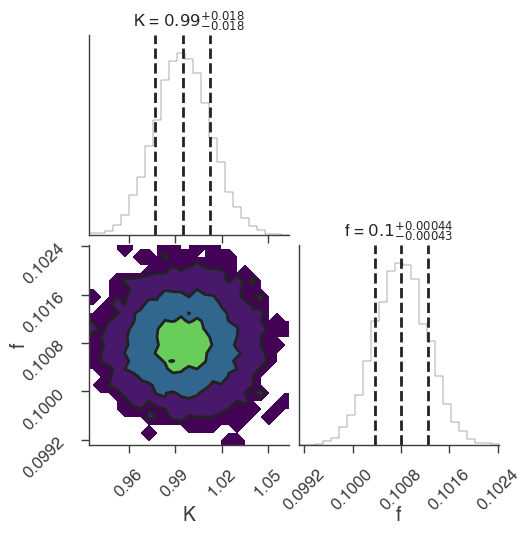

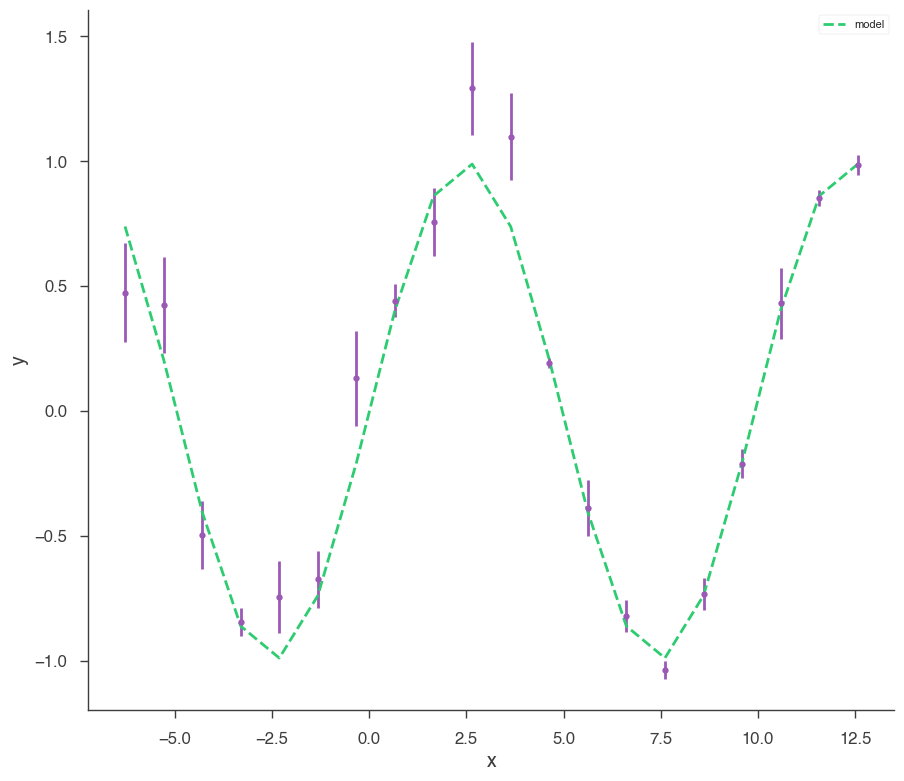

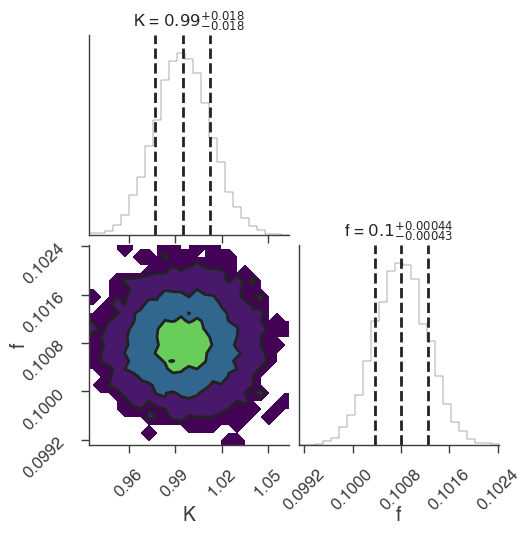

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

18:21:45 INFO      sampler set to ultranest                                                ]8;id=902964;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=433254;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 8335


[ultranest]   logZ = -19.41 +- 0.1439


[ultranest] Effective samples strategy satisfied (ESS = 972.7, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.43, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.14 tail:0.41 total:0.43 required:<0.50


[ultranest] done iterating.


18:21:52 INFO      fit restored to maximum of posterior                                         ]8;id=650882;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=890498;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=412889;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=53834;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.95 -0.20 +0.17) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.008 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-10.152147
total,-10.152147


Values of statistical measures:

,statistical measures
AIC,25.010176
BIC,26.295758
DIC,24.352185
PDIC,2.023232
log(Z),-8.405255


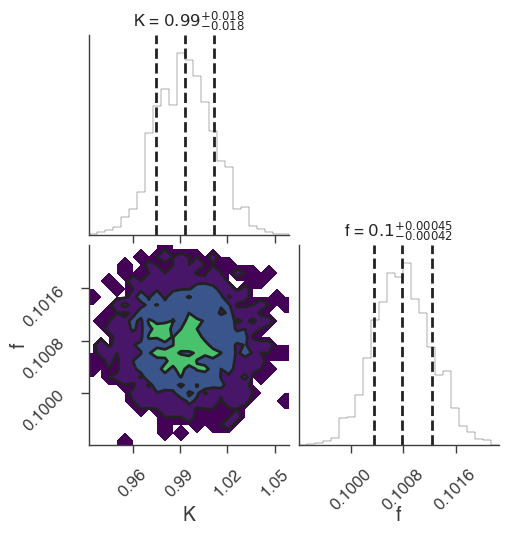

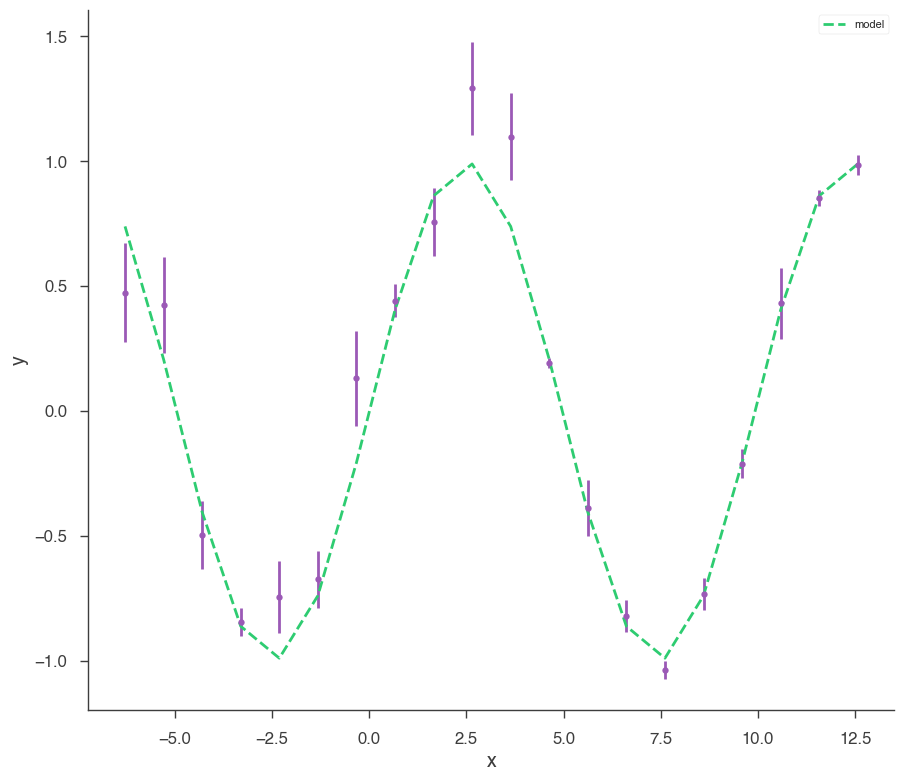

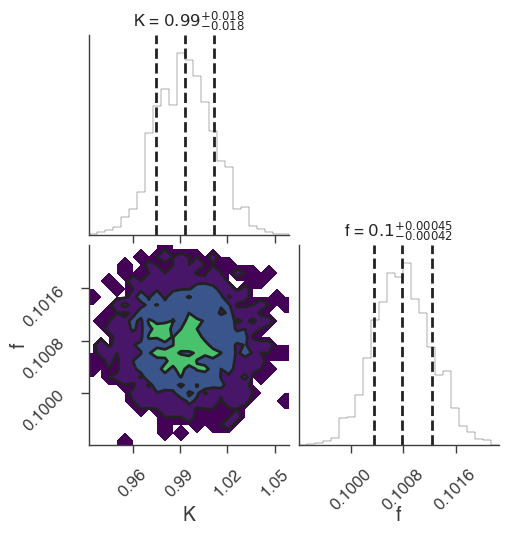

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()